In [1353]:
#Importing Necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import os
os.environ['MKL_DISABLE_THREADS'] = '2'

In [1354]:
# Load the CSV file
data = pd.read_csv("MLasmt2/Modified_Heart_failure_data.csv")

In [1355]:
#Understanding the ds
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,NaN,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,NaN,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,NaN,137.0,1.0,0.0,7.0,3
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,4


In [1356]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,299.000000
mean,60.934570,0.437037,574.266667,0.411111,37.622222,0.355556,261522.410185,1.355519,136.722222,0.640741,0.300000,131.292593,149.000000
std,11.838766,0.496941,958.532760,0.492949,11.715885,0.479570,97633.259068,0.981258,4.226033,0.480674,0.459109,77.579169,86.458082
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,52.000000,0.000000,119.500000,0.000000,30.000000,0.000000,210250.000000,0.900000,134.000000,0.000000,0.000000,73.250000,74.500000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,120.000000,149.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,139.000000,1.000000,1.000000,201.000000,223.500000
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,298.000000


In [1357]:
data.shape

(299, 13)

In [1358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       270 non-null    float64
 1   anaemia                   270 non-null    float64
 2   creatinine_phosphokinase  270 non-null    float64
 3   diabetes                  270 non-null    float64
 4   ejection_fraction         270 non-null    float64
 5   high_blood_pressure       270 non-null    float64
 6   platelets                 270 non-null    float64
 7   serum_creatinine          270 non-null    float64
 8   serum_sodium              270 non-null    float64
 9   sex                       270 non-null    float64
 10  smoking                   270 non-null    float64
 11  time                      270 non-null    float64
 12  patient_id                299 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 30.5 KB


<Axes: xlabel='age', ylabel='Count'>

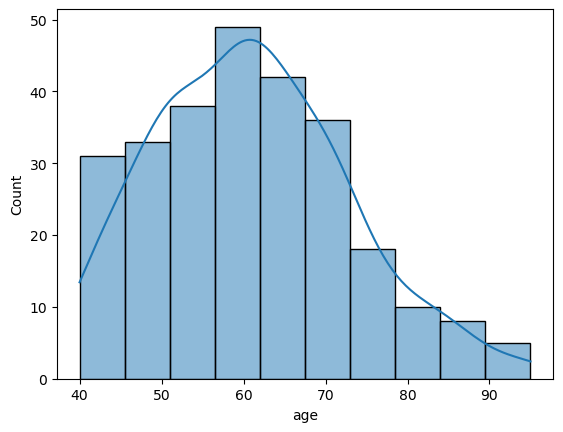

In [1359]:
#Data visualization to understand features
sns.histplot(data['age'],kde = True)

<Axes: xlabel='sex', ylabel='Count'>

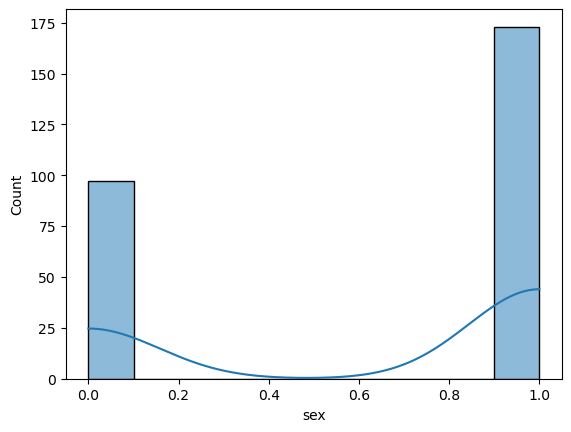

In [1360]:
sns.histplot(data['sex'],kde = True)

<Axes: xlabel='smoking', ylabel='Count'>

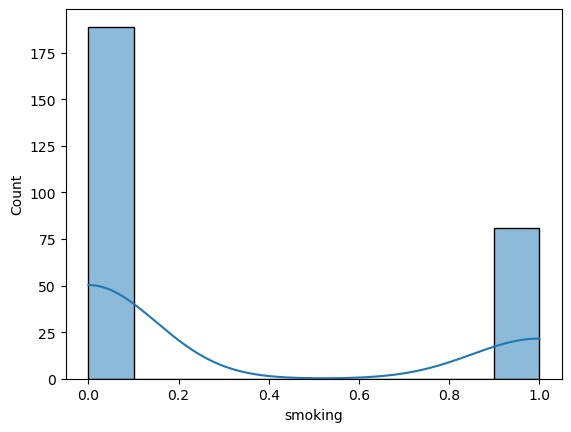

In [1361]:
sns.histplot(data['smoking'],kde = True)

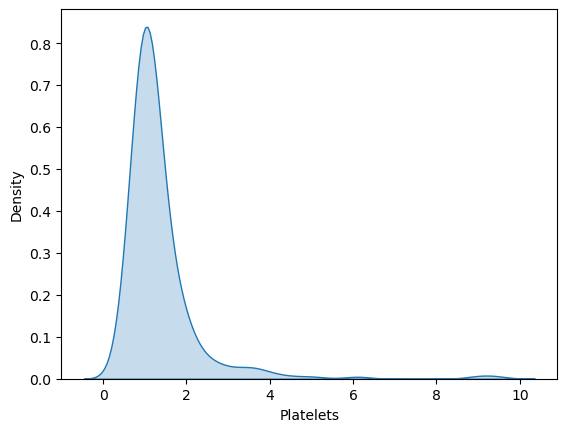

In [1362]:
sns.kdeplot(data=data['serum_creatinine'], fill=True)
plt.xlabel('Platelets')
plt.show()

Text(0.5, 1.0, 'c')

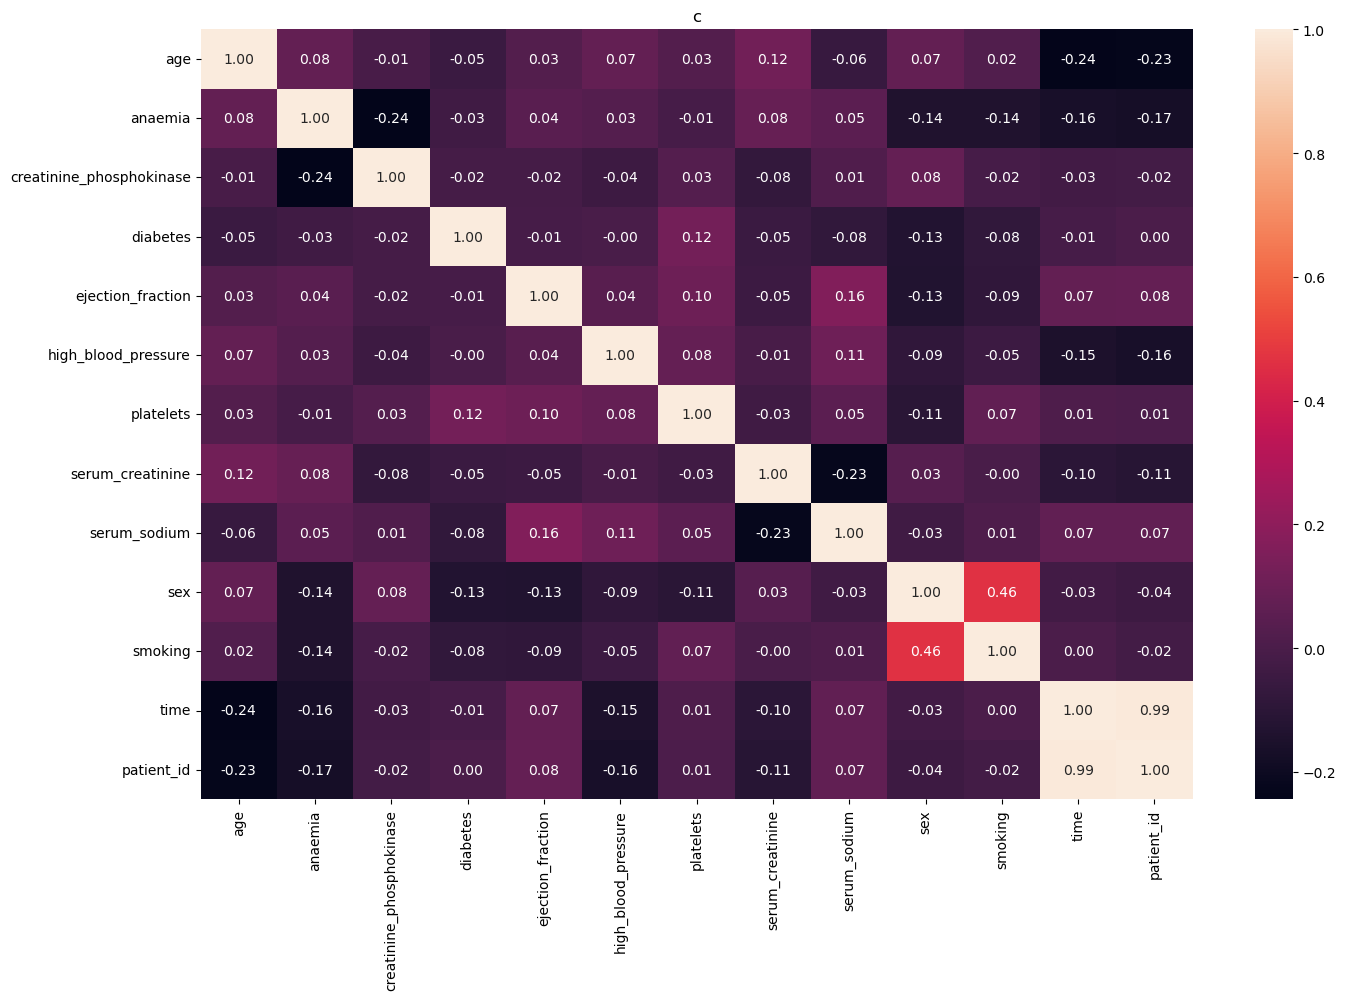

In [1363]:
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True,fmt=".2f")
plt.title("c")


In [1364]:
#age and ejection fraction have strong relationships with others, potentially influencing cluster formation.

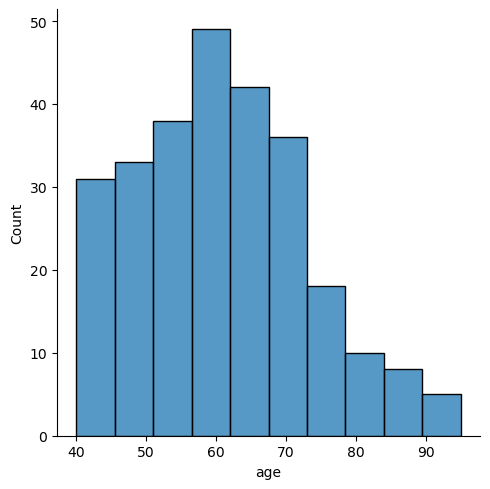

In [1365]:
#univariate analysis of continous distribution - age, creatinine,platelets , serum-creatinine,sodium
sns.displot(x=data['age'])

Text(0, 0.5, 'Diabetes')

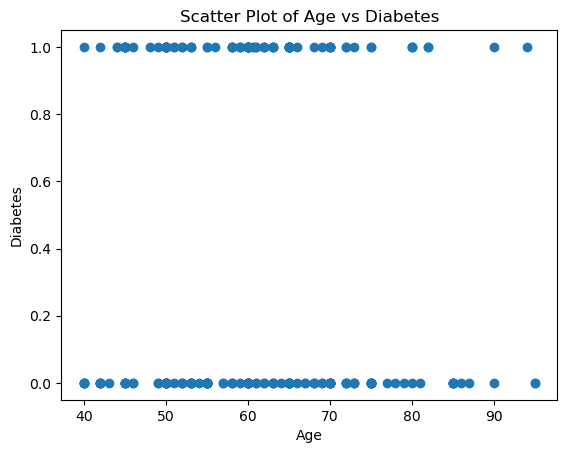

In [1366]:
plt.scatter(data['age'],data['diabetes'])
plt.title('Scatter Plot of Age vs Diabetes')
plt.xlabel('Age')
plt.ylabel('Diabetes')

In [1367]:
#Unique features
unique_counts = data.nunique()
print("Number of unique values in each column:\n", unique_counts)

Number of unique values in each column:
 age                          47
anaemia                       2
creatinine_phosphokinase    193
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   161
serum_creatinine             37
serum_sodium                 23
sex                           2
smoking                       2
time                        141
patient_id                  299
dtype: int64


In [1368]:
#Check missing values 
data.isnull().sum()

age                         29
anaemia                     29
creatinine_phosphokinase    29
diabetes                    29
ejection_fraction           29
high_blood_pressure         29
platelets                   29
serum_creatinine            29
serum_sodium                29
sex                         29
smoking                     29
time                        29
patient_id                   0
dtype: int64

In [1369]:
#Identify numerical features 
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical features include:", numerical_features)

# Identify categorical features
categorical_features = unique_counts[unique_counts <= 2].index.tolist()
print("\nCategorical features include:", categorical_features)


Numerical features include: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'patient_id']

Categorical features include: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


In [1370]:
# Handle missing values differently by Fill with Median/Mode
for col in numerical_features:
    data[col] = data[col].fillna(data[col].median())

for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])


In [1371]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'patient_id'],
      dtype='object')

In [1372]:
#Confirm again for null values 

In [1373]:
data.isnull().values.any()

False

In [1374]:
data.shape

(299, 13)

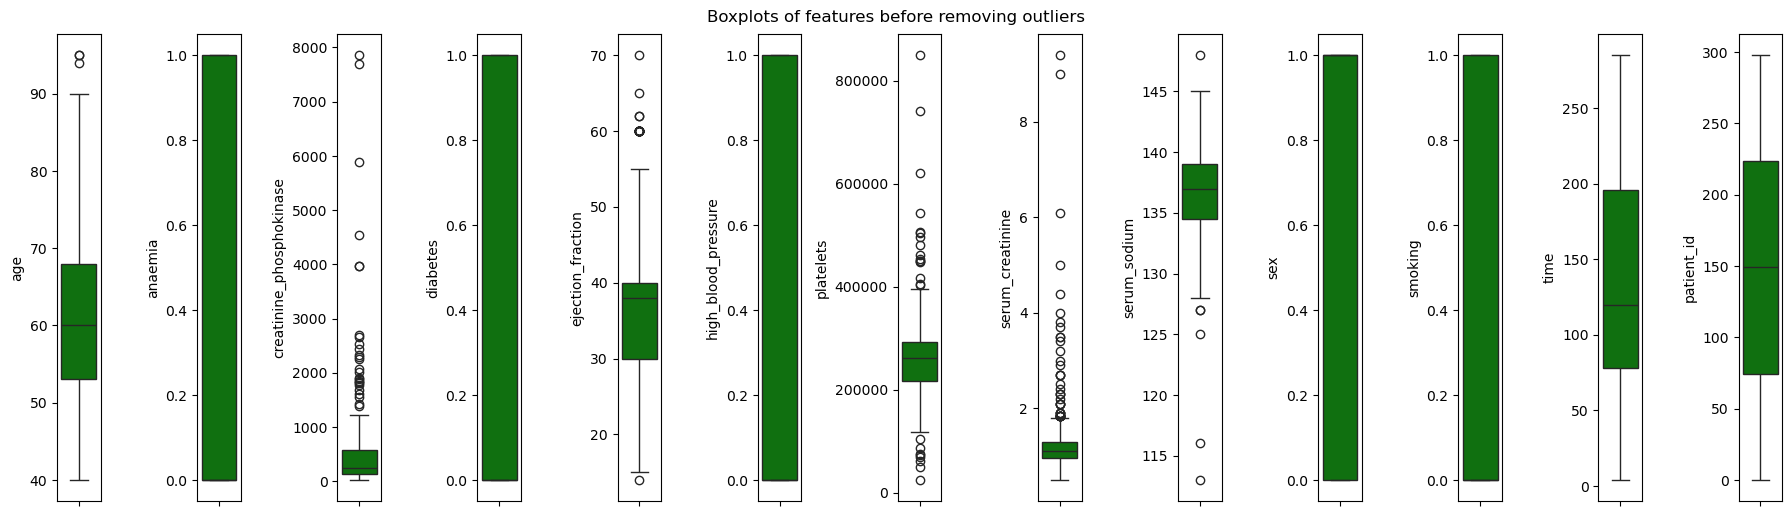

In [1375]:
#check for outliers with box plot 

fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 5))

for i, column in enumerate(numerical_features):
    sns.boxplot(y=data[column], ax=axes[i], color='green')
    axes[i].tick_params(axis='y', rotation=0)

plt.tight_layout(pad=1.0)
plt.suptitle("Boxplots of features before removing outliers", y=1.02, fontsize=12)

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

plt.show()


In [1376]:
#Handle Outliers 
outlier_columns = ['platelets','serum_creatinine','serum_sodium']

# df copy
data_no_outliers = data.copy()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to include only values within the bounds for this column
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to each column in outlier_columns on the copy
for column in outlier_columns:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, column)


In [1377]:
data_no_outliers

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,0.0,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.1,137.0,1.0,0.0,7.0,3
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0,1.0,0.0,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,0.0,103.0,1.0,35.0,0.0,179000.00,0.9,136.0,1.0,1.0,120.0,293
294,62.0,0.0,61.0,1.0,38.0,1.0,261000.00,1.1,143.0,1.0,1.0,120.0,294
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,295
297,45.0,0.0,250.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,297


In [1378]:
#feature scaling
numerical_features = data_no_outliers.select_dtypes(include=[np.number]).columns
#
scaler = StandardScaler()

cardiac_scaled = scaler.fit_transform(data_no_outliers[numerical_features])

scaler

StandardScaler()

In [1379]:
cardiac_scaled

array([[ 1.2949186 , -0.81787464,  0.0454966 , ..., -0.61010017,
        -1.75644464, -1.78005442],
       [-0.48959853, -0.81787464,  7.65045535, ..., -0.61010017,
        -1.72892534, -1.76829499],
       [ 0.40266003, -0.81787464, -0.41002778, ..., -0.61010017,
        -1.71516569, -1.75653556],
       ...,
       [-0.48959853, -0.81787464,  1.33893512, ..., -0.61010017,
         1.91738244,  1.68897833],
       [-1.38185709, -0.81787464, -0.30137059, ...,  1.63907509,
         2.0412193 ,  1.7124972 ],
       [-0.93572781, -0.81787464, -0.35778875, ...,  1.63907509,
         2.11001756,  1.72425663]])

In [1380]:
#Dimension Reduction
dim_pca= PCA(n_components=2)
pca_scaled_data= dim_pca.fit_transform(cardiac_scaled)
pca_scaled_data = pd.DataFrame(pca_scaled_data,columns =['variance 1','variance 2'])


In [1381]:
pca_scaled_data

,variance 1,variance 2
0,3.222041,2.396670
1,1.972032,2.695631
2,2.337990,2.146884
3,2.036631,0.404402
4,2.775035,1.076989
...,...,...
242,-1.331979,1.388193
243,-1.017492,0.485949
244,-2.565816,-0.583383
245,-3.101689,1.426773


C:\Users\Deepti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deepti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deepti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deepti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

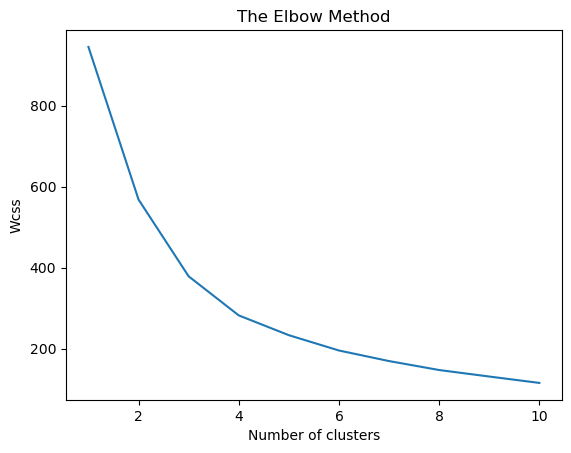

In [1382]:

# optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(pca_scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()


C:\Users\Deepti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


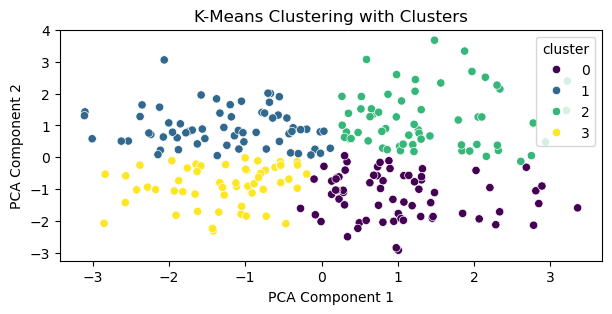

In [1450]:
from sklearn.cluster import KMeans

# Assuming you have the transformed data in pca_scaled_data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_scaled_data)

# Add cluster labels to the DataFrame
pca_scaled_data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(7 ,3))
sns.scatterplot(x='variance 1', y='variance 2', hue='cluster', data=pca_scaled_data, palette='viridis')
plt.title('K-Means Clustering with Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [1505]:
#Characteristics of each cluster
clusters_data = pd.concat([data, pd.DataFrame({'cluster':kMeans_labels})], axis=1)
for i in range(4):
    print(f"Cluster {i+1}:\n{clusters_data[clusters_data['cluster']==i].describe()}\n")

Cluster 1:
             age    anaemia  creatinine_phosphokinase   diabetes  \
count  99.000000  99.000000                 99.000000  99.000000   
mean   61.444444   0.393939                519.686869   0.343434   
std    11.384937   0.491108                930.256467   0.477272   
min    40.000000   0.000000                 47.000000   0.000000   
25%    53.000000   0.000000                148.500000   0.000000   
50%    60.000000   0.000000                250.000000   0.000000   
75%    70.000000   1.000000                582.000000   1.000000   
max    95.000000   1.000000               7702.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          99.000000            99.000000      99.000000   
mean           37.898990             0.333333  258163.861313   
std            11.457548             0.473804  104950.314686   
min            15.000000             0.000000   62000.000000   
25%            30.000000             0.000000  197000.00

In [1385]:
#Hierarchial Clustering 

Text(0, 0.5, 'Eucledian Distance')

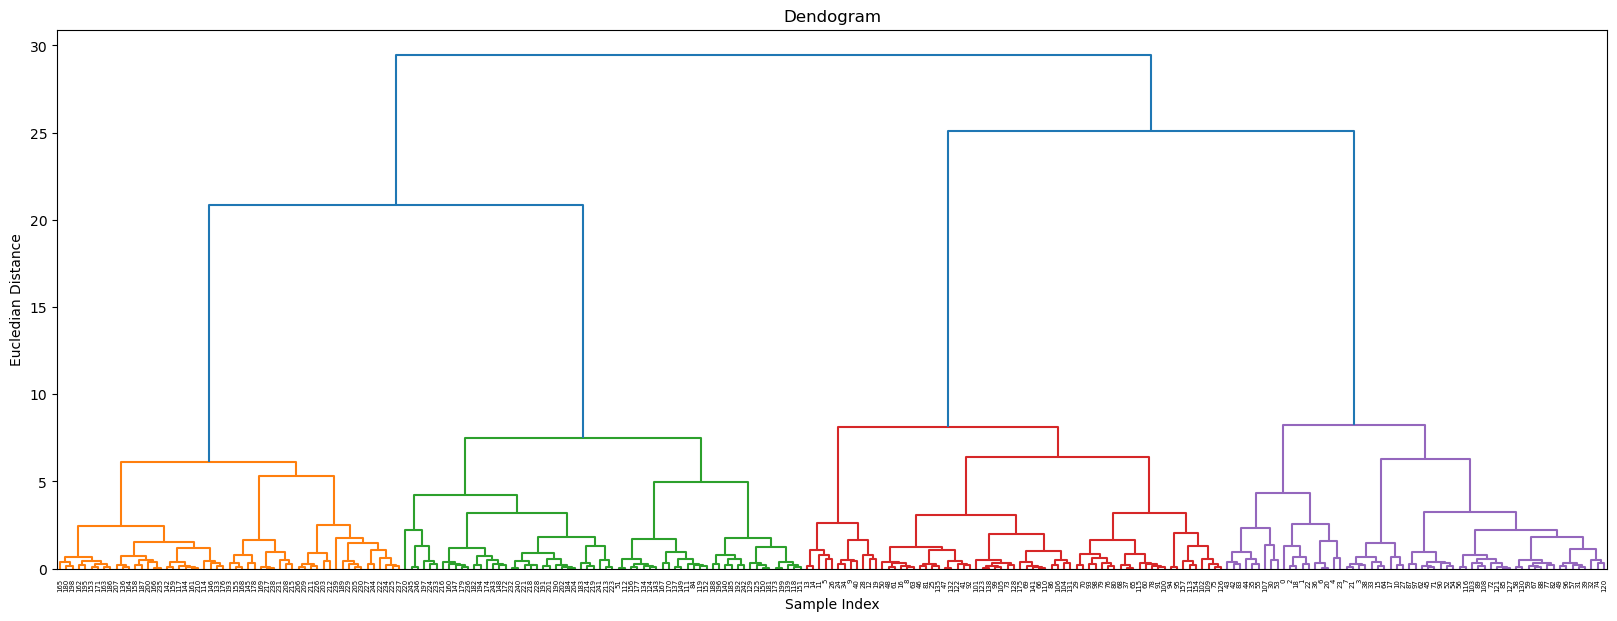

In [1454]:
# Agglomerative Clustering
import scipy.cluster.hierarchy as sc
#plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

# interpret with dendogram
sc.dendrogram(sc.linkage(pca_scaled_data,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [1474]:
#Apply model
model=AgglomerativeClustering(n_clusters=5,linkage='ward')
hier_labels = model.fit_predict(pca_scaled_data)

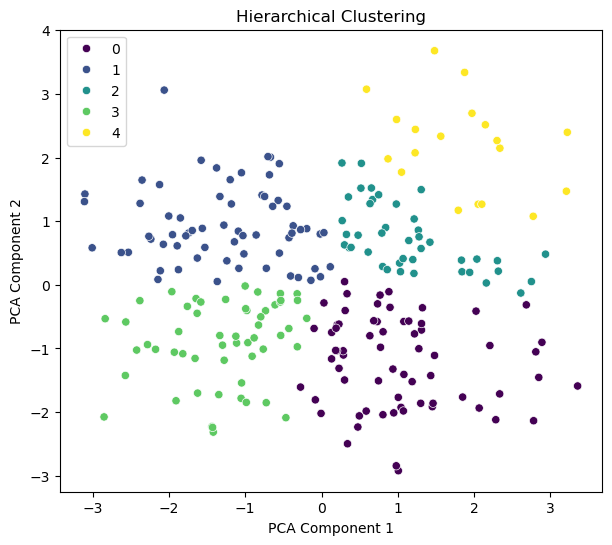

In [1498]:
#Visualise the cluster
plt.figure(figsize=(7, 6))
sns.scatterplot(x='variance 1', y='variance 2', hue=hier_labels, data=pca_scaled_data, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [1478]:
## silhouette score
from sklearn.metrics import silhouette_score

silhouette_score_kmeans = silhouette_score(pca_scaled_data, kmeans_labels)
silhouette_score_hc = silhouette_score(pca_scaled_data, hier_labels)

print("Silhouette Score for K-Means:", silhouette_score_kmeans)
print("Silhouette Score for Hierarchical Clustering:", silhouette_score_hc)

Silhouette Score for K-Means: 0.5330392832410321
Silhouette Score for Hierarchical Clustering: 0.49153287562692766


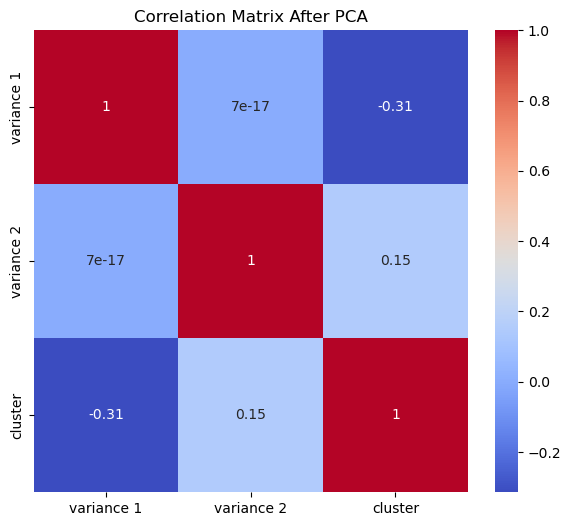

In [1501]:
#Evaluation Matrix
corr_matrix_pca = pca_scaled_data.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix_pca, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After PCA')
plt.show()